In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.metrics import confusion_matrix

In [2]:
n_samples = 1000
n_outliers = 100
X, Y= make_classification(n_samples=n_samples,n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state =42)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [4]:
class CustomQuadraticDiscriminantAnalysis:

    def init(self):
        self.mu0 = None
        self.mu1 = None

        self.cov0 = None
        self.cov1 = None

        self.phi0 = None
        self.phi1 = None

        self.p0 = None
        self.p1 = None

    def fit(self, X, y):
        self.mu0 = np.average(X[y==0], axis=0)
        self.mu1 = np.average(X[y==1], axis=0)

        self.cov0 = np.cov(X[y==0], rowvar = False)
        self.cov1 = np.cov(X[y==1], rowvar = False)

        self.phi0 = y[y==0].shape[0]/y.shape[0]
        self.phi1 = 1 - self.phi0

        self.p0 = multivariate_normal(self.mu0, self.cov0)
        self.p1 = multivariate_normal(self.mu1, self.cov1)
        return self.cov0, self.cov1



    def predict(self, X):
        y_pred = []
        for x in X:
            if self.p0.pdf(x)*self.phi0< self.p1.pdf(x)*self.phi1:
                y_pred.append(1)
            else:
                y_pred.append(0)
        return np.array(y_pred )       

    def score(self, X, y):
        y_pred = self.predict(X)

        score= (y.shape[0] -  np.count_nonzero((y_pred - y)))/ y.shape[0]
        return score

cqda=CustomQuadraticDiscriminantAnalysis()
cqda.fit(X_train, y_train)
print(cqda.score(X_test, y_test))

0.9090909090909091


In [5]:
cm=confusion_matrix(y_test,cqda.predict(X_test))
print(cm)

[[150  14]
 [ 16 150]]


In [6]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qlf = QuadraticDiscriminantAnalysis()
qlf.fit(X_train, y_train)
print(qlf.score(X_test, y_test))
cm=confusion_matrix(y_test,qlf.predict(X_test))
print(cm)

0.9090909090909091
[[150  14]
 [ 16 150]]


In [7]:
class CustomLinearDiscriminantAnalysis:

    def init(self):
        self.mu0 = None
        self.mu1 = None

        self.cov = None

        self.phi0 = None
        self.phi1 = None

        self.p0 = None
        self.p1 = None

    def fit(self, X, y):
        self.mu0 = np.average(X[y==0], axis=0)
        self.mu1 = np.average(X[y==1], axis=0)

        self.phi0 = y[y==0].shape[0]/y.shape[0]
        self.phi1 = 1 - self.phi0
        
        self.cov = np.dot(X.T, X) / X.shape[0]
        #self.cov = np.cov(X, rowvar = False)

        self.p0 = multivariate_normal(self.mu0, self.cov)
        self.p1 = multivariate_normal(self.mu1, self.cov)
        return self.mu0, self.mu1, self.phi0, self.phi1



    def predict(self, X):
        y_pred = []
        for x in X:
            if self.p0.pdf(x)*self.phi0< self.p1.pdf(x)*self.phi1:
                y_pred.append(1)
            else:
                y_pred.append(0)
        return np.array(y_pred )       

    def score(self, X, y):
        y_pred = self.predict(X)

        score= (y.shape[0] -  np.count_nonzero((y_pred - y)))/ y.shape[0]
        return score

clda=CustomLinearDiscriminantAnalysis()
mu0, mu1, phi0, phi1 = clda.fit(X_train, y_train)
# print(clda.predict(X_test))
print(clda.score(X_test, y_test))
cm=confusion_matrix(y_test,clda.predict(X_test))
print(cm)

0.9212121212121213
[[154  10]
 [ 16 150]]


In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis(store_covariance=True)
clf.fit(X_train, y_train)
LinearDiscriminantAnalysis()
# print(clf.predict(X_test))
print(clf.score(X_test, y_test))
clf.covariance_
cm=confusion_matrix(y_test,clf.predict(X_test))
print(cm)

0.9181818181818182
[[154  10]
 [ 17 149]]


# we use in CustomLinearDiscriminantAnalysis
`self.cov = np.dot(X.T, X) / X.shape[0] `
# also we can use 
`self.cov = np.cov(X, rowvar = False)`

# if we work with a large number of features.
`from sklearn.covariance import empirical_covariance
empirical_covariance(X_train)`

`from sklearn.covariance import EmpiricalCovariance
cov = EmpiricalCovariance().fit(X_train)
cov.covariance_`


# Plot boundaries

In [9]:
from matplotlib import colors
# Plot functions
def plot_data(lda, X, y, y_pred, fig_index):
    splot = plt.subplot(2, 2, fig_index)
    if fig_index == 1:
        plt.title('Linear Discriminant Analysis')
    elif fig_index == 2:
        plt.title('Quadratic Discriminant Analysis')

    tp = (y == y_pred)  # True Positive
    tp0, tp1 = tp[y == 0], tp[y == 1]
    X0, X1 = X[y == 0], X[y == 1]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]

    # class 0: dots
    plt.scatter(X0_tp[:, 0], X0_tp[:, 1], marker='.', color='green')


    # class 1: dots
    plt.scatter(X1_tp[:, 0], X1_tp[:, 1], marker='.', color='orange')


    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='Greens_r',
                   norm=colors.Normalize(0., 1.), zorder=0)
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='red')

    # means
    plt.plot(lda.means_[0][0], lda.means_[0][1],
             '*', color='yellow', markersize=15, markeredgecolor='grey')
    plt.plot(lda.means_[1][0], lda.means_[1][1],
             '*', color='yellow', markersize=15, markeredgecolor='grey')

    return splot


C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:33: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:33: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


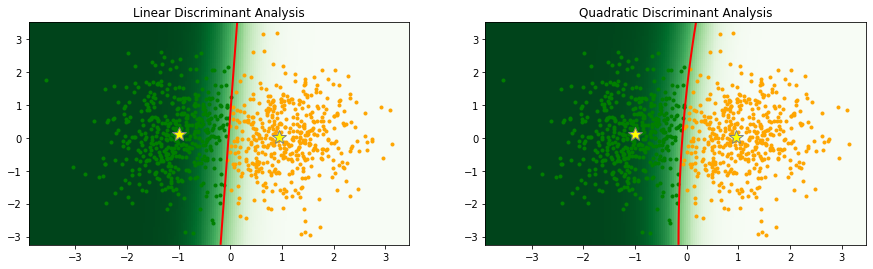

In [10]:
plt.rcParams['figure.figsize'] = [15, 9]
for i, (X, y) in enumerate([(X, Y)]):
    # Linear Discriminant Analysis
    lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
    y_pred = lda.fit(X, y).predict(X)
    splot = plot_data(lda, X, y, y_pred, fig_index=2 * i + 1)
    plt.axis('tight')
    # Quadratic Discriminant Analysis
    qda = QuadraticDiscriminantAnalysis(store_covariance=True)
    y_pred = qda.fit(X, y).predict(X)
    splot = plot_data(qda, X, y, y_pred, fig_index=2 * i + 2)
    plt.axis('tight')